In [ ]:
#import the libraries
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read the dataset
drive.mount('/content/drive')
df_train = pd.read_csv("/content/drive/MyDrive/archive/fraudTrain.csv")
df_test = pd.read_csv("/content/drive/MyDrive/archive/fraudTest.csv")

Mounted at /content/drive


In [ ]:
#read the dataset
df = pd.concat([df_train, df_test], ignore_index=True, axis=0)
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [ ]:
df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02   
25%   -9.679800e+01  7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01   
50%   -8.747690e+01  2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01   
75%   -8.015800e+01  2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01   
max   -6.795030e+01  2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.852394e+06  
mean   5.210015e-03  
std    7.199217e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

In [ ]:
#legit and fraudlent
print(df['is_fraud'].value_counts())
legit = df[df.is_fraud==0]
fraudlent = df[df.is_fraud==1]
print(f"legit data: {legit.shape}")
print(f"fraudlent data: {fraudlent.shape}")

0    1842743
1       9651
Name: is_fraud, dtype: int64
legit data: (1842743, 23)
fraudlent data: (9651, 23)


In [ ]:
#under sampling
legit = legit.sample(n=9700)
print(f"legit data: {legit.shape}")
print(f"fraudlent data: {fraudlent.shape}")
df=pd.concat([legit,fraudlent],axis=0)
print(df.sort_index())

legit data: (9700, 23)
fraudlent data: (9651, 23)
         Unnamed: 0 trans_date_trans_time               cc_num  \
176             176   2019-01-01 02:10:12     4740713119940984   
271             271   2019-01-01 03:30:49       36078114201167   
360             360   2019-01-01 04:42:23       38588538868506   
506             506   2019-01-01 06:39:59     3590736522064285   
659             659   2019-01-01 08:36:25     3583635130604947   
...             ...                   ...                  ...   
1851288      554613   2020-12-31 17:37:10     4265776278887457   
1851454      554779   2020-12-31 18:28:41  4223708906367574214   
1851793      555118   2020-12-31 20:30:50      213161231269724   
1851883      555208   2020-12-31 21:02:06       30030380240193   
1852105      555430   2020-12-31 22:15:27       30407675418785   

                                     merchant        category     amt  \
176                     fraud_Brown-Greenholt   entertainment    5.27   
271        

In [ ]:
#statistical measures
print(df.describe())
print(df.groupby('is_fraud').mean())

         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.935100e+04  1.935100e+04  19351.000000  19351.000000  19351.000000   
mean   5.386690e+05  3.975616e+17    298.099432  48464.971423     38.663691   
std    3.792391e+05  1.277992e+18    375.506985  27079.031702      5.111601   
min    1.760000e+02  6.041621e+10      1.000000   1257.000000     20.027100   
25%    2.150450e+05  1.800365e+14     20.170000  25213.000000     34.847000   
50%    4.593270e+05  3.520550e+15     88.850000  47863.000000     39.433600   
75%    8.667740e+05  4.633065e+15    465.165000  71762.000000     42.074000   
max    1.296623e+06  4.992346e+18   8517.380000  99921.000000     66.693300   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  19351.000000  1.935100e+04  1.935100e+04  19351.000000  19351.000000   
mean     -90.209527  8.794817e+04  1.357116e+09     38.661089    -90.210209   
std       14.130837  2.979177e+05  1.817924e+07    

<ipython-input-7-c5a531823b49>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('is_fraud').mean())


In [ ]:
#print number of unique categories for every attribute
print(f"Total number of rows: {df.shape[0]}")
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

Total number of rows: 19351
Unnamed: 0: 19300
trans_date_trans_time: 19345
cc_num: 999
merchant: 693
category: 14
amt: 13994
first: 355
last: 486
gender: 2
street: 999
city: 906
state: 51
zip: 985
lat: 983
long: 983
city_pop: 891
job: 497
dob: 984
trans_num: 19351
unix_time: 19345
merch_lat: 19338
merch_long: 19345
is_fraud: 2


In [ ]:
#dropping columns and check for null values
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
print(f"Null values: {df.isnull().values.any()}")
print(df.columns)

Null values: False
Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


In [ ]:
#calculate entropy for taget variable
target = "is_fraud"
probabilities = df[target].value_counts(normalize=True)/len(df)
entropy = -np.sum(probabilities*np.log2(probabilities))
print(f"{target}: {entropy}")

is_fraud: 0.0007875621867953986


In [ ]:
#change string labels to numerical
label_encoder = LabelEncoder()
stringTypeColumns = ['trans_date_trans_time','cc_num', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'dob','trans_num']
for column in stringTypeColumns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
#calculate information gain for the features
X=df.drop('is_fraud', axis=1)
y=df['is_fraud']
information_gain = mutual_info_classif(X, y, discrete_features='auto', random_state=1)
information_gain

array([0.25748812, 0.08298698, 0.09281903, 0.08651023, 0.4525601 ,
       0.03049561, 0.03859248, 0.00135004, 0.07616792, 0.07114658,
       0.00488369, 0.07923783, 0.07601854, 0.07323542, 0.06354338,
       0.03173214, 0.0775402 , 0.00234236, 0.24890171, 0.00185617,
       0.0011095 ])

In [ ]:
#print the information gain
info_gain = pd.Series(information_gain)
info_gain.index = X.columns
info_gain.sort_values(ascending= False)

amt                      0.452560
trans_date_trans_time    0.257488
unix_time                0.248902
merchant                 0.092819
category                 0.086510
cc_num                   0.082987
zip                      0.079238
dob                      0.077540
street                   0.076168
lat                      0.076019
long                     0.073235
city                     0.071147
city_pop                 0.063543
last                     0.038592
job                      0.031732
first                    0.030496
state                    0.004884
trans_num                0.002342
merch_lat                0.001856
gender                   0.001350
merch_long               0.001109
dtype: float64

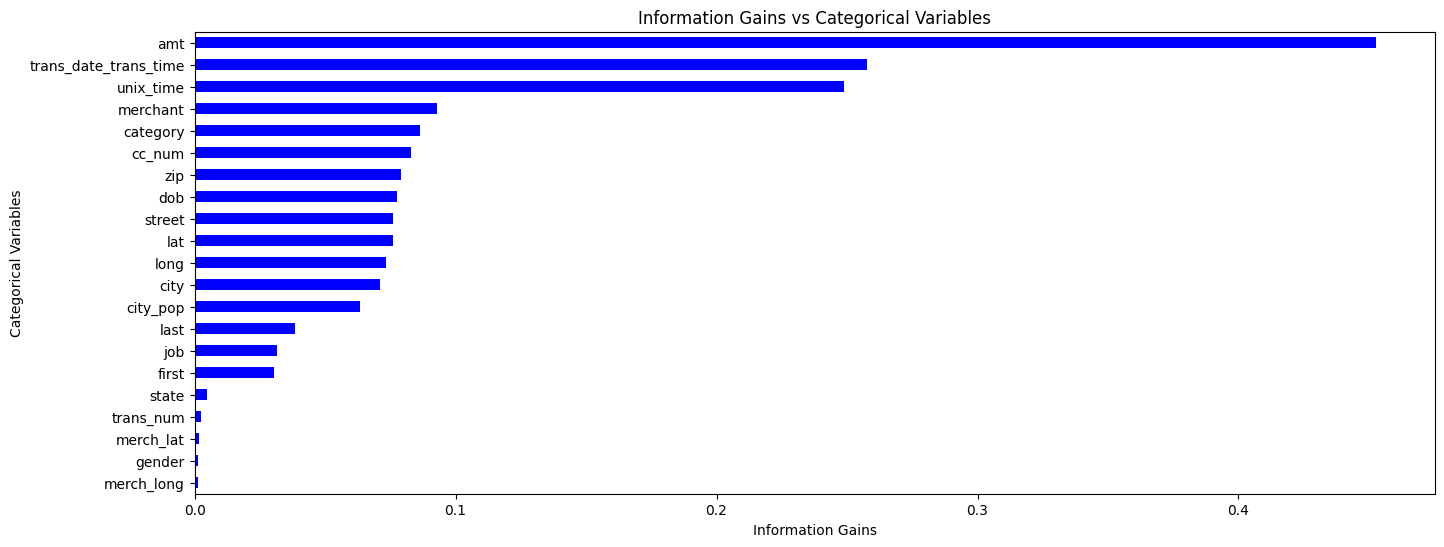

In [ ]:
#plot the information gain graph
ax = info_gain.sort_values(ascending = True).plot(kind='barh', color='blue', figsize=(16, 6))

plt.xlabel('Information Gains')
plt.ylabel('Categorical Variables')
plt.title('Information Gains vs Categorical Variables')

plt.show()

In [ ]:
#selecting features and create new dataframe
select_cols = SelectKBest(mutual_info_classif, k=10)
select_cols.fit_transform(X,y)
selected_indices = select_cols.get_support(indices=True)
selected_indices = list(selected_indices) + [df.columns.get_loc('is_fraud')]
new_df = df.iloc[:, selected_indices]
print(new_df.sort_index())

         trans_date_trans_time  cc_num  merchant  category     amt  street  \
176                          0     767        81         0    5.27     134   
271                          1     219       130         4  145.21     963   
360                          2     238       548         2   60.20     314   
506                          3     627       592         9   76.40     738   
659                          4     616        29         4  206.85     908   
...                        ...     ...       ...       ...     ...     ...   
1851288                  19340     688       230         1   91.13     692   
1851454                  19341     924       234         7   49.45     279   
1851793                  19342     295       188         6   32.20     636   
1851883                  19343     157       274         5   76.44     517   
1852105                  19344     198       341        12   12.88     785   

         zip      lat      long   unix_time  is_fraud  
176    

In [ ]:
#print new dataframe statistical measures
print(f"Total number of rows: {new_df.shape[0]}")
for col in new_df.columns:
  print(f'{col}: {new_df[col].nunique()}')
print(new_df.describe())
print(new_df.groupby('is_fraud').mean())

Total number of rows: 19351
trans_date_trans_time: 19345
cc_num: 999
merchant: 693
category: 14
amt: 13994
street: 999
zip: 985
lat: 983
long: 983
unix_time: 19345
is_fraud: 2
       trans_date_trans_time        cc_num      merchant      category  \
count           19351.000000  19351.000000  19351.000000  19351.000000   
mean             9672.016537    497.293266    341.036949      6.734277   
std              5584.208423    286.417764    197.287791      3.870311   
min                 0.000000      0.000000      0.000000      0.000000   
25%              4836.500000    249.000000    173.000000      4.000000   
50%              9672.000000    493.000000    345.000000      7.000000   
75%             14506.500000    744.000000    504.000000     11.000000   
max             19344.000000    998.000000    692.000000     13.000000   

                amt        street           zip           lat          long  \
count  19351.000000  19351.000000  19351.000000  19351.000000  19351.000000   

In [ ]:
# perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('is_fraud', axis=1), new_df['is_fraud'], test_size=0.3, random_state=41)

In [ ]:
# Perform Grid Search Cross-Validation
dt_model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 8]
}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 5}


In [ ]:
# Create Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params)
best_dt_model.fit(X_train, y_train)
y_pred = best_dt_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.961591457113331
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2893
           1       0.96      0.97      0.96      2913

    accuracy                           0.96      5806
   macro avg       0.96      0.96      0.96      5806
weighted avg       0.96      0.96      0.96      5806

Confusion Matrix:
 [[2761  132]
 [  91 2822]]


In [ ]:
# Display feature importances
feature_importances = best_dt_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.5f}")

Feature Importances:
trans_date_trans_time: 0.00292
cc_num: 0.00198
merchant: 0.00123
category: 0.16852
amt: 0.81564
street: 0.00274
zip: 0.00216
lat: 0.00137
long: 0.00166
unix_time: 0.00177


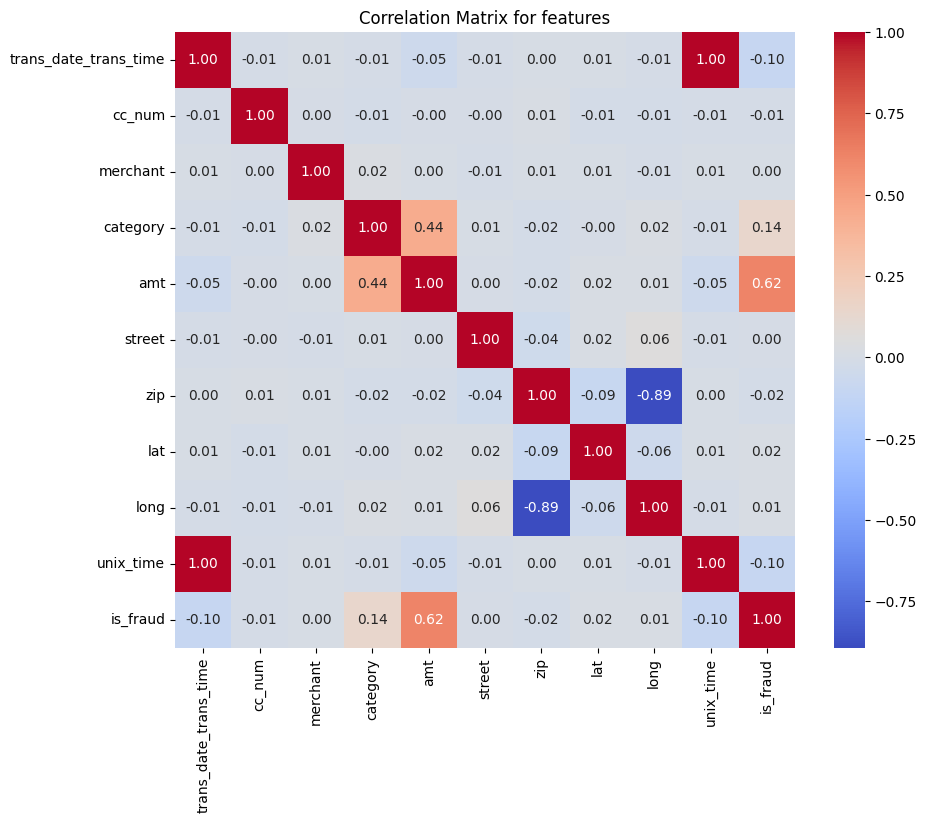

In [ ]:
#plot correlaion matrix
correlation_matrix=new_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for features")
plt.show()

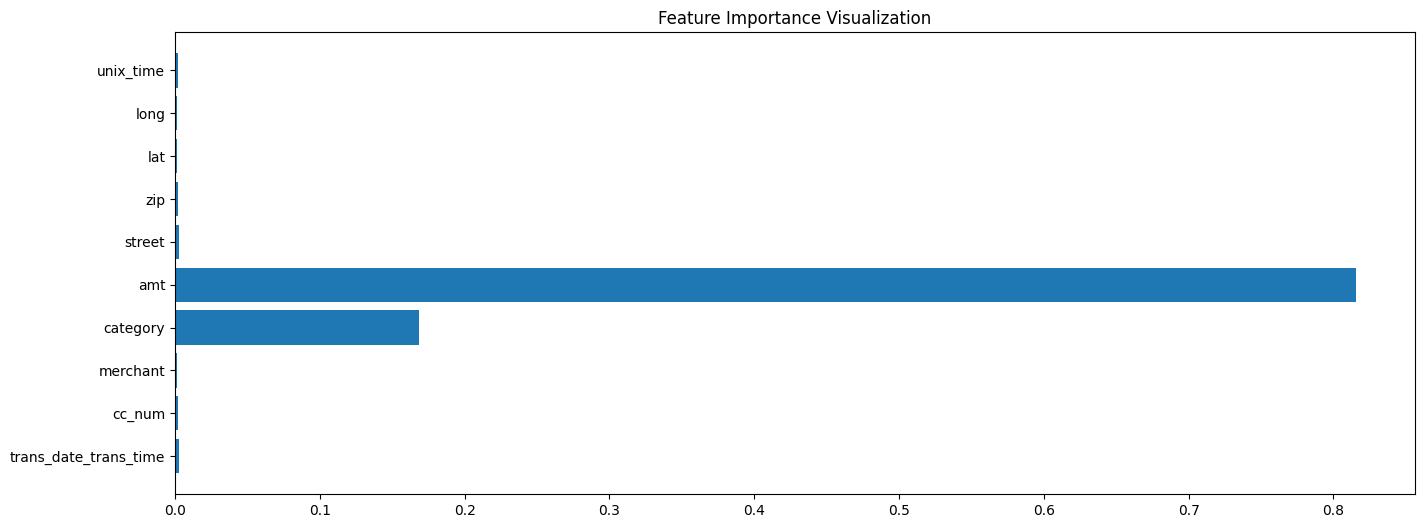

In [ ]:
#plot feature importances
plt.figure(figsize=(16, 6))
plt.barh(X_train.columns, best_dt_model.feature_importances_)
plt.title('Feature Importance Visualization')
plt.show()

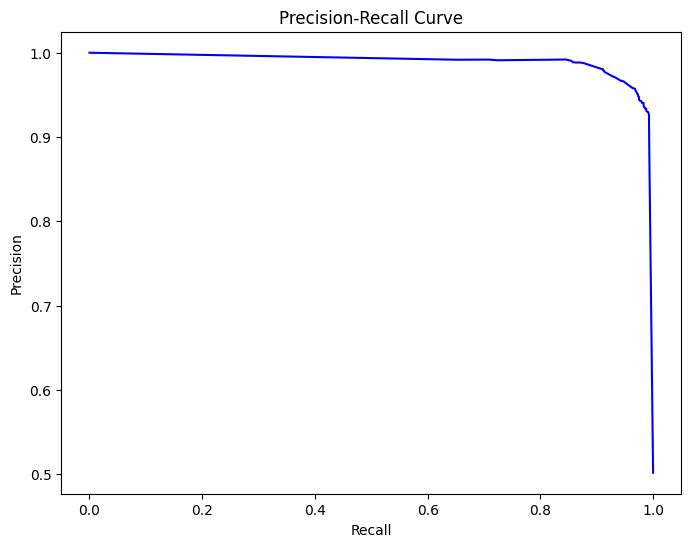

In [ ]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

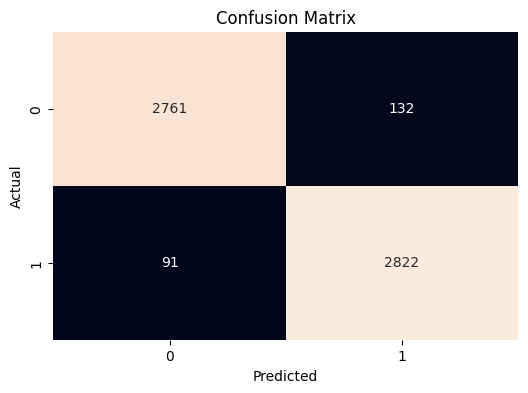

In [ ]:
# Plot the confusion matrix using heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(150, 100))
plot_tree(best_dt_model, filled=True, feature_names=[f"Feature {i}" for i in range(X.shape[1])], class_names=["0", "1"])
plt.show()